<font color='orange'>Objective:   code simple neural network from scratch using numpy.<br>


Implementation Methodology:  Using Numpy and Python without using scikit or built-in Machine Learning libraries </font>

Supervised machine learning 

In [1]:
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

**generate our synthetic data. generate data(X) some random values of 200 points  has a linear fashion from a uniform distribution.**

**Build the Linear Regression as a class**

In [29]:
class NN_LinearRegression:

    def __init__(self, slope=3, N=200, mu=0, sigma=0.1, epoch=300, eta=0.001):
        
        #Initialize the data X and Y with random values of N numbers
        self._generate_x_sample(N)

        #Initialize the parameters slope and intercept.
        self._init_parameters(N, slope, mu, sigma)

        self.y_hat = self.w_1 * self.x + self.w_0 * self.x_0                  #Initializes the line
        self.epoch = epoch                                                    #No. of Iteration
        self.eta = eta                                                        #Learning rate to be used in gradient descent

        #Generate the actual /ground truth y data
        self._generate_Y()

    def _init_parameters(self, N, slope, mu, sigma):
        # Define the line slope and the Gaussian noise parameters
        self.slope = slope                                #apt the slope randomly

        self.mu, self.sigma = mu, sigma                   # mean and standard deviation
        self.intercept = np.random.normal(mu, sigma, N)   # sample the intercept from a normal distribution of Gaussian distribution with mean 0 and standard deviation of 0.1

        #initialize weights/learnable parameters using a uniform distribution
        self.w_1 = np.random.uniform(-2,-3,1)
        self.w_0 = np.random.uniform(0,2,1)
        self.x_0 = 1                          # Bias unit

    #Generates N samples of random uniform distributed values.
    def _generate_x_sample(self, N):
        self.x = np.random.rand(N)

    #Generates true /ground truth y actual values 
    def _generate_Y(self):
        self.y = self.slope * self.x + self.intercept

    #Linear and SSE functions are leveraged during the forward-pass phase of training our ANN
    def Linear(self, Z):
        return Z     # it does nothing but just seem to have the feel of having network

    # The sum squared error (SSE) of individual errors for each input data
    def SSE(self):
        return 0.50*np.sum((self.y- self.y_hat)**2)

    #Computes the derivative of our error function w.r.t. both of our learnable parameters w_0 and w_1
    #Gradients (w.r.t w1 and w0-bias) are requied the back-propagation phase

    def gradient_w1 (self):
        return np.sum(-(self.y - self.y_hat) * self.x)

    # Derive gradients with respect to w0
    def gradient_w0 (self):
        return np.sum(-(self.y - self.y_hat))

  
    #fit method to train the model  
    def fit(self):
        cost = []

        for iter in tqdm(range(self.epoch+1)):
            #Compute Linear Function
            Z = self.w_1 * self.x + self.w_0 * self.x_0
            self.y_hat = self.Linear(Z)       #Pass the computed linear data into Linear() to get the prediction (i.e.) y_hat.
            
            #Invoke SSE (Sum-Squared Error): Computes the derivative of error (dE) w.r.t y_hat  (i.e.)  y_hat - y
            dE = self.SSE()
            cost.append(dE)      #append computed error occured in each iteration into cost list object.
            
            dedw1 = self.gradient_w1()
            dedw0 = self.gradient_w0()

            self.w_1 = self.w_1 - self.eta*dedw1
            self.w_0 = self.w_0 - self.eta*dedw0 
        
        return cost


    def show_pretrained_model(self, graph_size):
        area = np.pi*10
        plt.figure(figsize=graph_size)

        plt.scatter(self.x, self.y, s=area, c='r', alpha=0.5)
        plt.ylim(-3, 5)
        plt.grid()
        plt.title('Data Points')
        plt.xlabel('x (Our data)')
        plt.ylabel('y (ground-truth)')
        plt.show()

    def show_trained_model(self, graph_size, cost):
          area = np.pi*10

          for iter in range(self.epoch+1):
                if iter % 20 == 0:
                  plt.figure(figsize=graph_size)
                  plt.scatter(self.x, self.y, s=area, c='r', alpha=0.5)
                  plt.plot(self.x, self.y_hat, '-b', label="SSE= %.2f" %cost[iter] + '\n' + "Epoch Number= %d" %(iter))
                  plt.xlabel('x (Our Data)')
                  plt.ylabel('y_hat (Network Outputs)')
                  plt.legend()
                  plt.ylim(-3, 5)
                  plt.grid()
                  plt.show()
          
          #Visualizes the overall final cost/loss
          plt.plot(cost, 'r')
          plt.grid()
          plt.title("Error/Cost")
          plt.xlabel("Epochs")
          plt.ylabel("SSE")
          plt.show()


**Invoke the Linear Regression**

Pre Trained Model of our Data


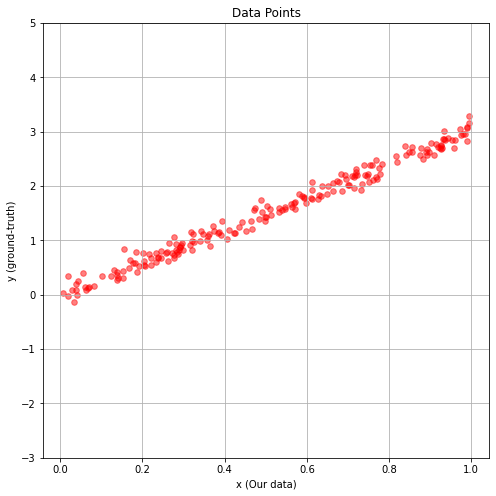

100%|██████████| 301/301 [00:00<00:00, 19352.89it/s]


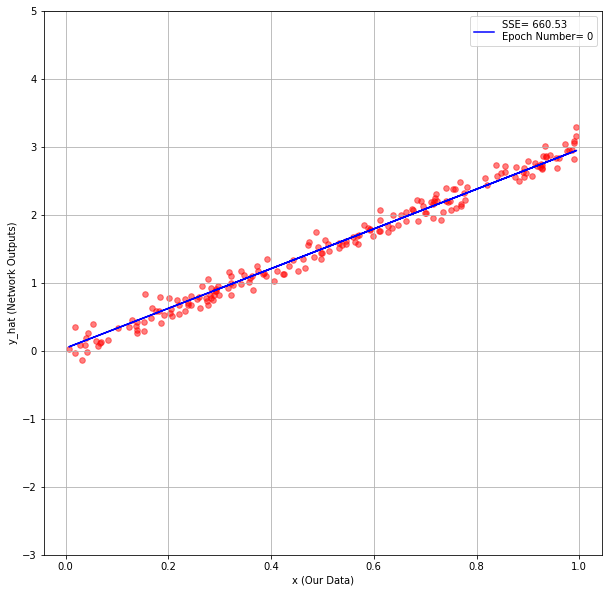

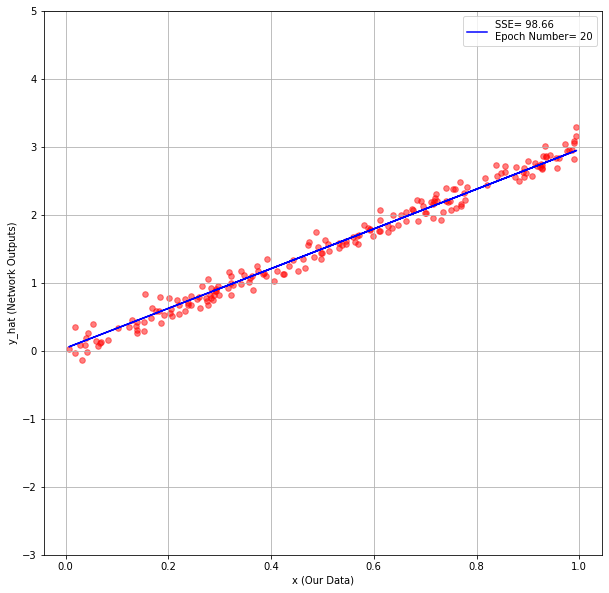

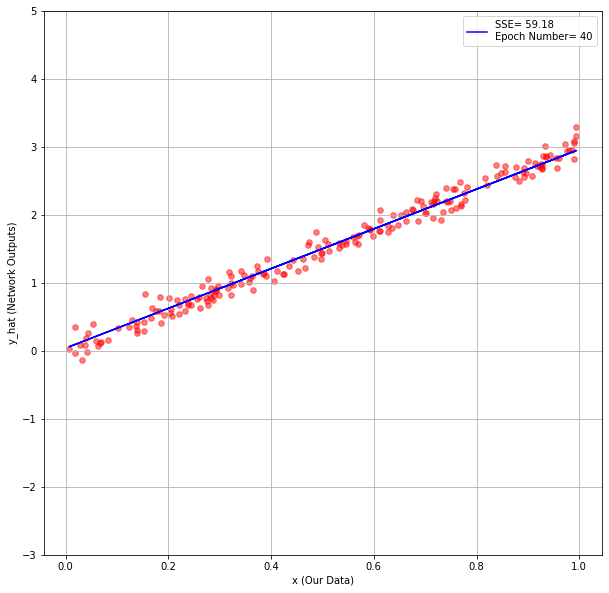

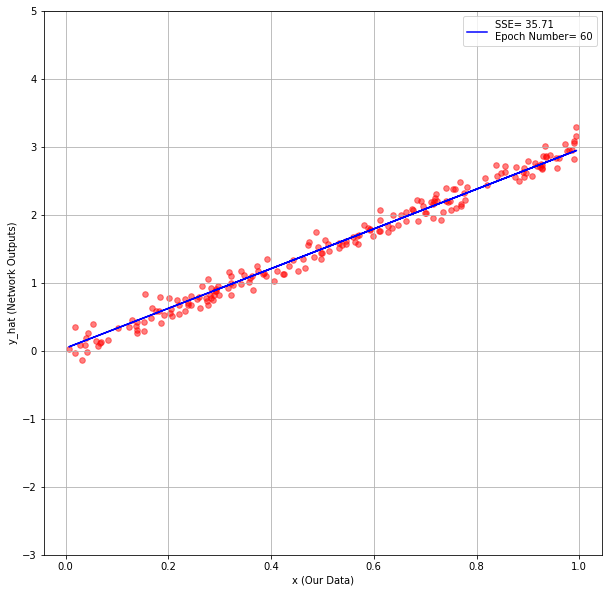

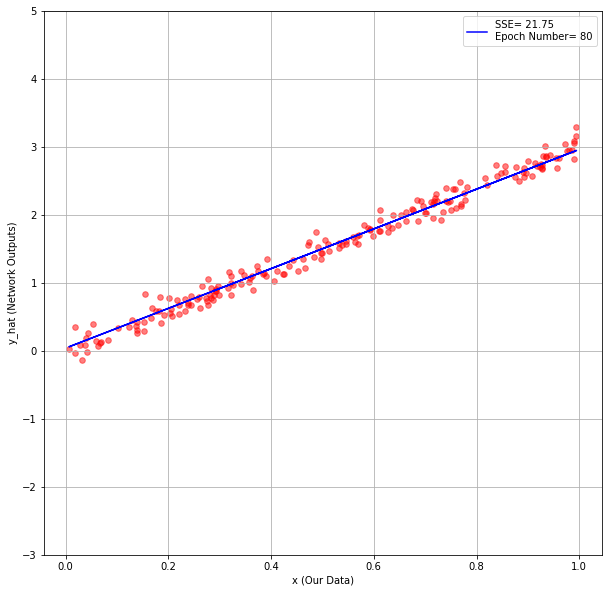

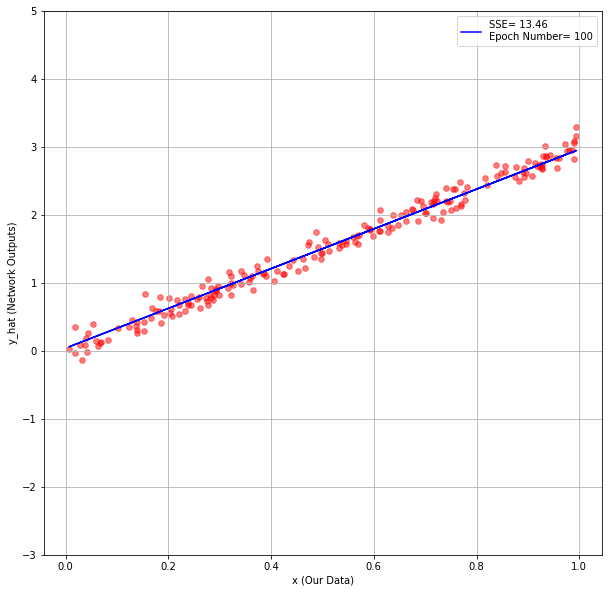

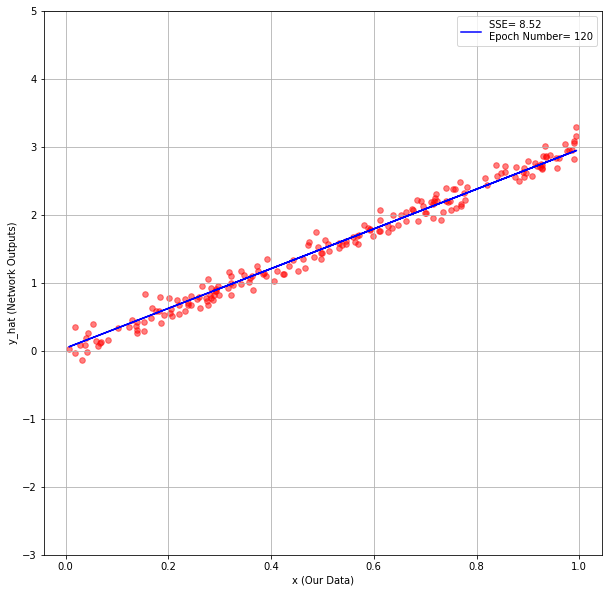

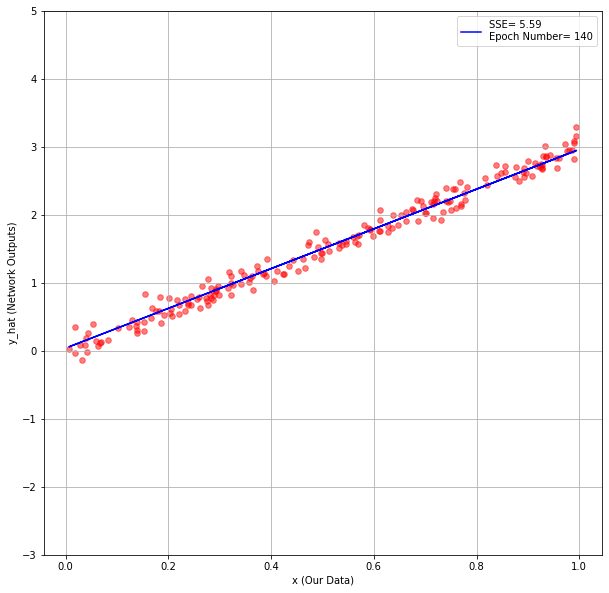

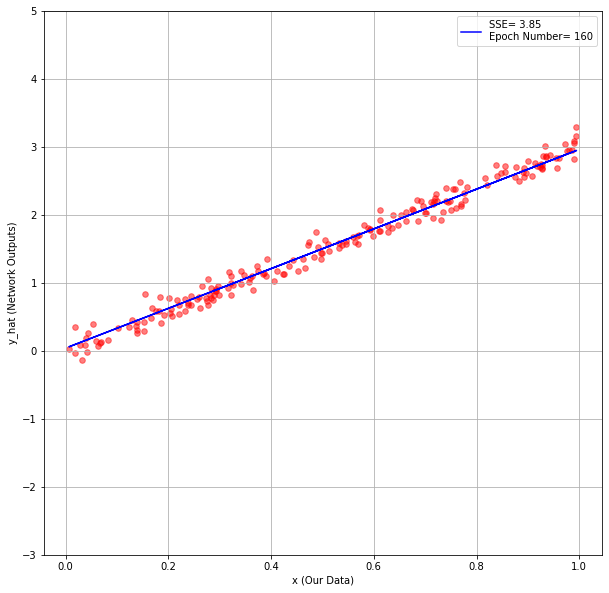

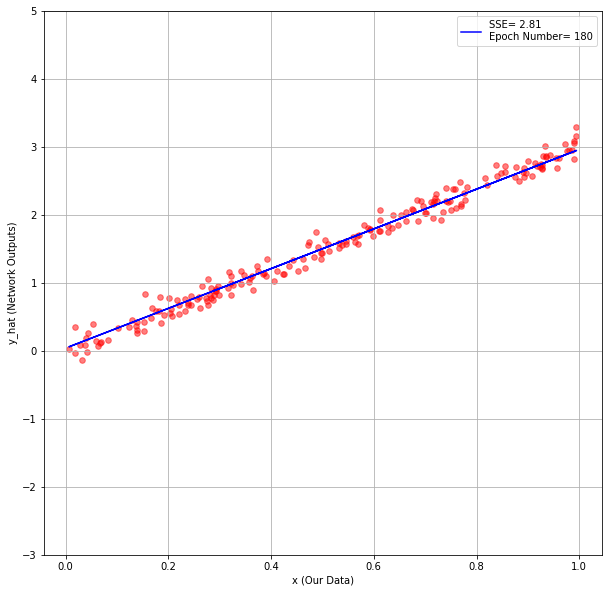

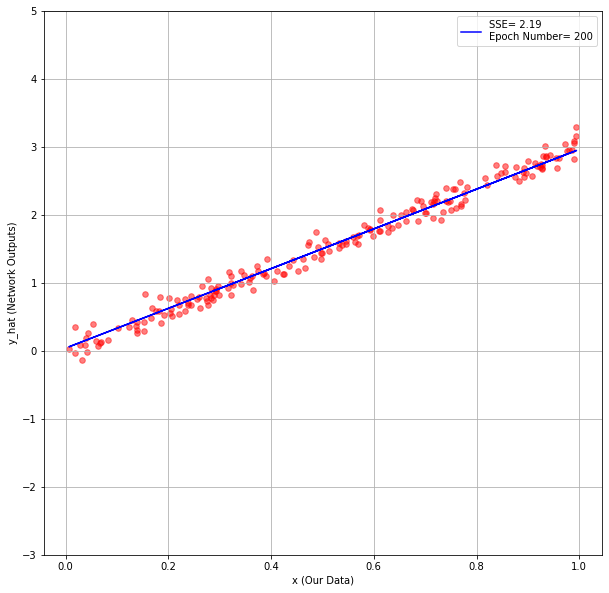

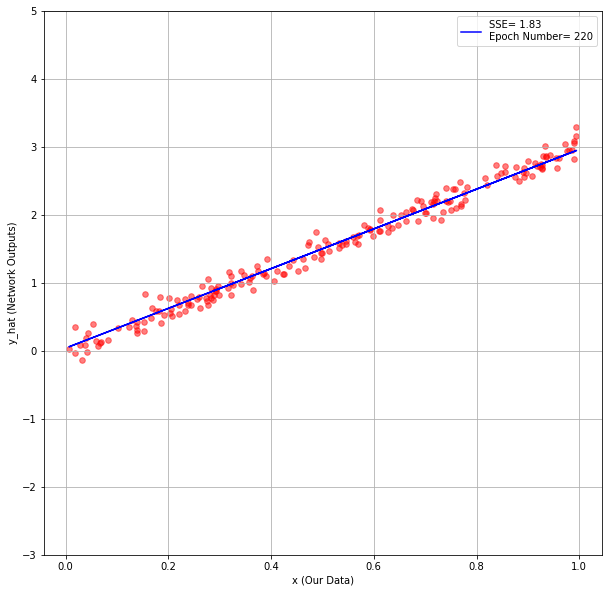

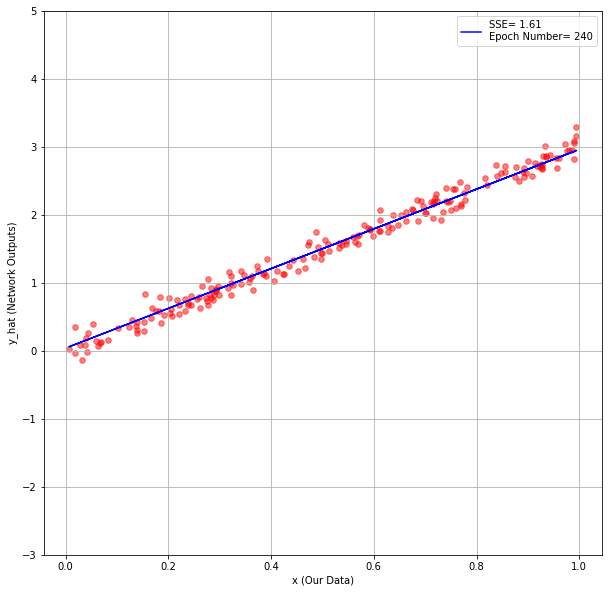

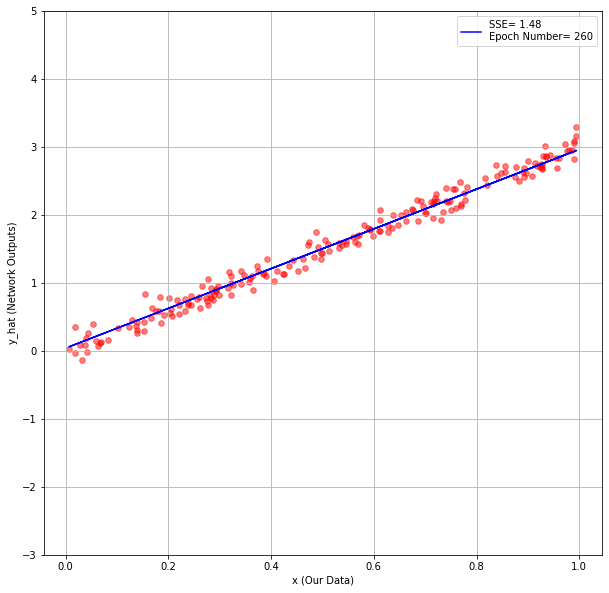

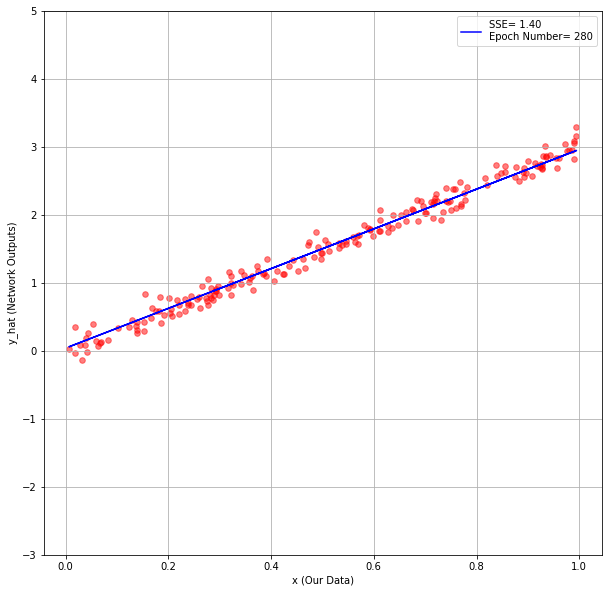

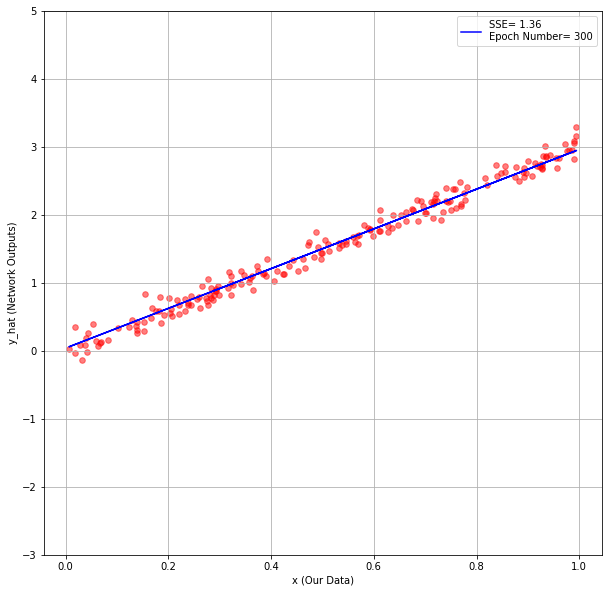

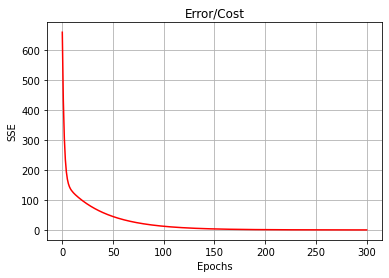

In [31]:
obj_NN= NN_LinearRegression()

print("Pre Trained Model of our Data")
print("=============================")
obj_NN.show_pretrained_model((8,8))

cost = obj_NN.fit()

obj_NN.show_trained_model((10,10), cost) 